In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1.Data Collection

In [2]:
data = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,5/2/2010,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,12/2/2010,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,5/3/2010,0,46.50,2.625,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,0,64.88,3.997,192.013558,8.684,713173.95
6431,45,5/10/2012,0,64.89,3.985,192.170412,8.667,733455.07
6432,45,12/10/2012,0,54.47,4.000,192.327265,8.667,734464.36
6433,45,19-10-2012,0,56.47,3.969,192.330854,8.667,718125.53


In [3]:
#information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Weekly_Sales  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.head()

#Shows the first five rows of the DataFrame.

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,5/2/2010,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,12/2/2010,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,5/3/2010,0,46.50,2.625,211.350143,8.106,1554806.68


In [5]:
data.tail()

#Displays the last five rows of the DataFrame

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
6430,45,28-09-2012,0,64.88,3.997,192.013558,8.684,713173.95
6431,45,5/10/2012,0,64.89,3.985,192.170412,8.667,733455.07
6432,45,12/10/2012,0,54.47,4.000,192.327265,8.667,734464.36
6433,45,19-10-2012,0,56.47,3.969,192.330854,8.667,718125.53
6434,45,26-10-2012,0,58.85,3.882,192.308899,8.667,760281.43


In [6]:
data.describe()

#Generate descriptive statistics for the dataframe df.

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965e+06
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885,5.643666e+05
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000,2.099862e+05
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000,5.533501e+05
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000,9.607460e+05
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000,1.420159e+06
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000,3.818686e+06


In [7]:
data['Weekly_Sales'].mean()

#Finds the mean of a column

1046964.8775617715

In [8]:
data['Weekly_Sales'].median()

#Finds the median of a column

960746.04

In [9]:
data.count()

#Counts the number of Rows(non-null entries) in each column.

Store           6435
Date            6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
Weekly_Sales    6435
dtype: int64

In [10]:
data['Weekly_Sales'].std()
    
#standard deviation of given data 

564366.6220536974

In [11]:
data.min()

#minimum

Store                   1
Date            1/10/2010
Holiday_Flag            0
Temperature         -2.06
Fuel_Price          2.472
CPI               126.064
Unemployment        3.879
Weekly_Sales    209986.25
dtype: object

In [12]:
data.max()

#maximum

Store                   45
Date              9/9/2011
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
Weekly_Sales    3818686.45
dtype: object

# 2.Data Preprocessing

In [13]:
data.isnull().sum()

#shows the sum of null values in a column

Store           0
Date            0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64

In [14]:
data.duplicated()

#Checks for duplicate rows in the dataset.

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [15]:
data.drop(columns=['Date',],inplace=True)

#Droping the column

# 3.Exploratory Data Analysis

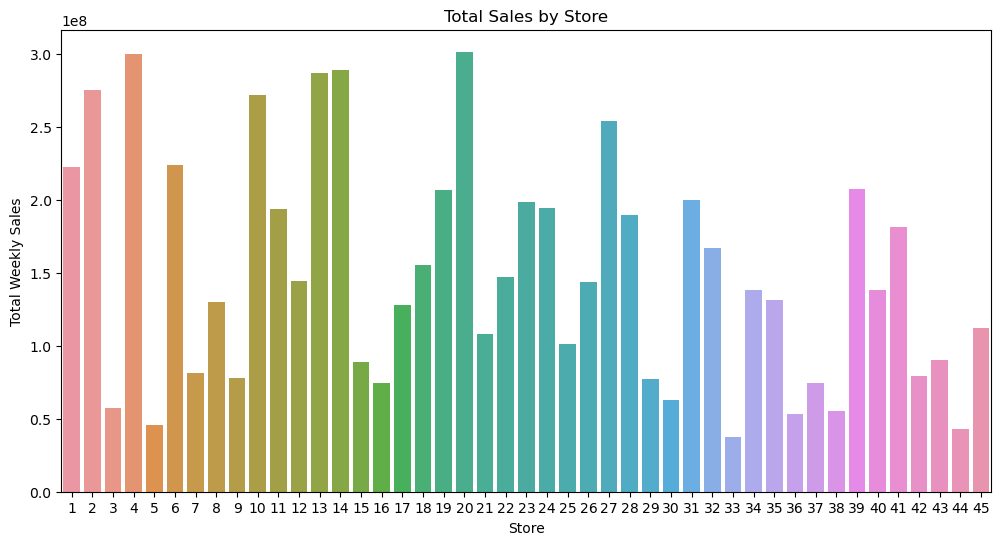

In [16]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales per store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Barplot

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Sales by Store')
plt.show()

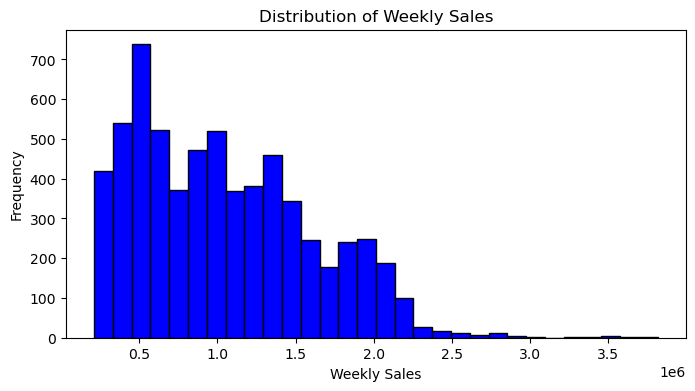

In [17]:
#Histogram

plt.figure(figsize=(8, 4))
plt.hist(data['Weekly_Sales'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

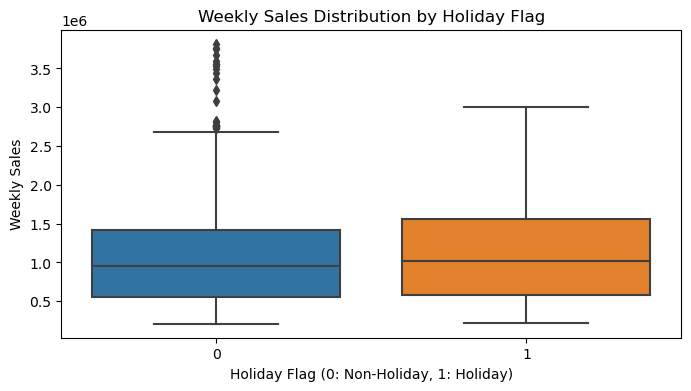

In [18]:
#Boxplot

plt.figure(figsize=(8, 4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.xlabel('Holiday Flag (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Holiday Flag')
plt.show()

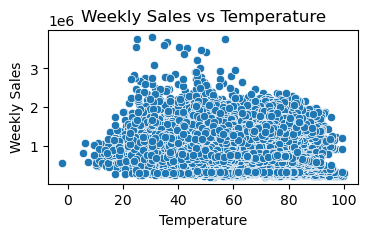

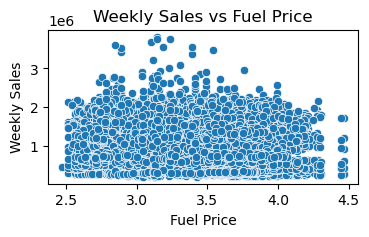

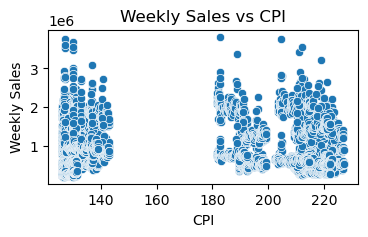

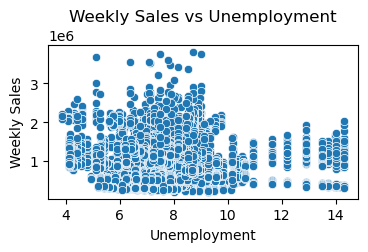

In [19]:
#Scatterplot 

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Temperature')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Fuel Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs CPI')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Unemployment')
plt.show()


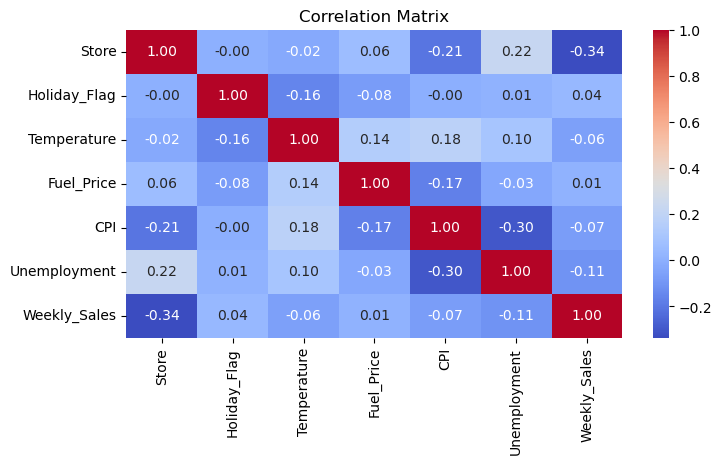

In [20]:
#Heatmap

plt.figure(figsize=(8, 4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 4.Data Modelling

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

#Splits the DataFrame into features (X) and target variable (Y)

In [22]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [23]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
         test_size = 0.10, random_state = 17)

#Test And Train Splitting

In [25]:
X_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5644,40,0,56.38,4.101,134.680387,4.781
6348,45,0,38.65,3.433,184.387991,8.549
3980,28,0,84.51,4.110,131.098323,11.627
336,3,0,50.74,3.016,215.126827,7.551
4283,30,0,76.10,3.717,222.217440,6.565
...,...,...,...,...,...,...
1337,10,0,56.75,3.336,127.440484,8.744
406,3,0,78.58,3.561,225.251517,6.664
5510,39,0,84.60,3.651,214.171342,8.177
2191,16,0,32.46,2.781,191.143019,6.986


In [26]:
#LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# accuracy score
score = r2_score(y_test,y_pred)
print(score)

0.1350726214996507


In [27]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")


In [28]:
#predicting values
pred = model.predict([[1,0,46.50,2.625,211.350143,8.106 ]])
pred

array([1300274.00480764])

In [29]:
#MultiLinear Regression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracy score
MuRg = r2_score(y_test,y_pred)
print(MuRg)

0.1350726214996507


In [30]:
#predicting values
predMR = model.predict([[45,0,64.88,3.997,192.013558,8.684]])
predMR

array([651177.9968395])

In [31]:
#Tree Regression

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
pred1 = model.predict(X_test)

# accuracy score
score2 = r2_score(y_test,y_pred)
print(score2)

0.1350726214996507


In [32]:
#predicting values
predDT = model.predict([[45,0,58.85,3.882,192.308899,8.667]])
predDT

array([760281.43])

In [33]:
#RandomForest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
score_rf = r2_score(y_test, y_pred_rf)
print(score_rf)

0.9411850633076743


In [34]:
#predicting values
predRF = model.predict([[1,0,42.31,2.572,211.096358,8.106]])
predRF

array([1643690.9])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 72503.23961770188
Mean Squared Error (MSE): 17963801689.84767
Root Mean Squared Error (RMSE): 134029.10762161954


In [36]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared: {cv_scores.mean()}")


Cross-validated R-squared: 0.927176741644568


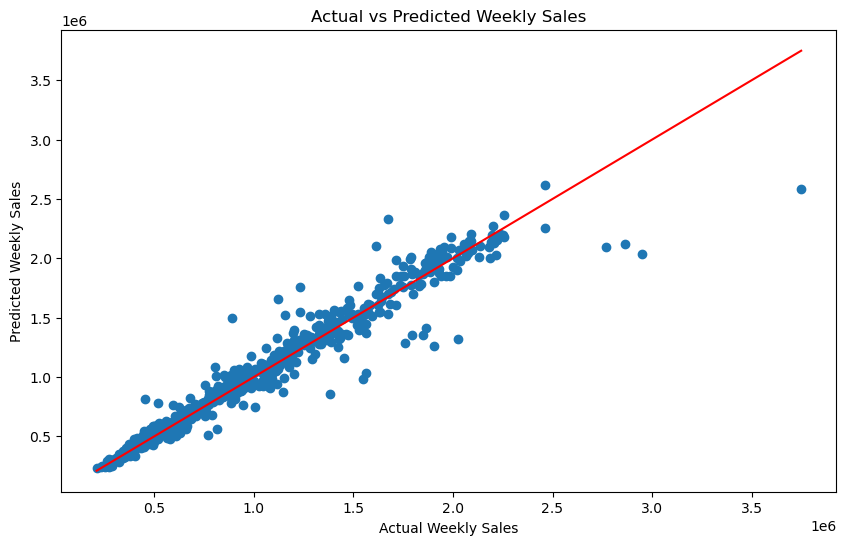

In [38]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()

In [39]:
df1=pd.DataFrame({'Algorithm':['LinearRegression','MultiLinear Regression','DecisionTreeRegressor','RandomForestRegressor'],
                  'Accuracy':[score,MuRg,score2,score_rf],
                  'Prediction':[pred,predMR,predDT,predRF,]})
df1

,Algorithm,Accuracy,Prediction
0,LinearRegression,0.135073,[1300274.0048076399]
1,MultiLinear Regression,0.135073,[651177.9968394963]
2,DecisionTreeRegressor,0.135073,[760281.43]
3,RandomForestRegressor,0.941185,[1643690.9]
